In [11]:
import pandas as pd

df = pd.read_csv('Data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [14]:
import numpy as np
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [18]:
df["date_added"].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [19]:
df["date_added"] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0


In [20]:
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                float64
month_name_added            object
year_added                 float64
dtype: object

In [21]:
#retrieve only the first country in case there are multiple countries
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

In [22]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [23]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'month_name_added', 'year_added', 'first_country',
       'target_ages', 'genre'],
      dtype='object')

In [70]:
df['first_country'].unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', '',
       'Ireland', 'New Zealand', 'Jordan', 'Colombia', 'Switzerland',
       'Israel', 'Brazil', 'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Kuwait', 'Malaysia', 'Vietnam',
       'Sweden', 'Lebanon', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Pakistan', 'Cyprus', 'Paraguay', 'Croatia',
       'Cambodia', 'Georgia', 'Sovie

In [27]:
# create a main genre column taking only the first genre in the list
df['main_genre'] = df['genre'].apply(lambda x: x[0])

In [30]:
#create a column called genre_count to count the number of genres in each row
df['genre_count_added'] = df['genre'].apply(lambda x: len(x))


/var/folders/y5/f3yrmbzn2jq1rcxqy582qldm0000gn/T/ipykernel_30590/2391112179.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))


There are 20 types in the Netflix Movie Dataset


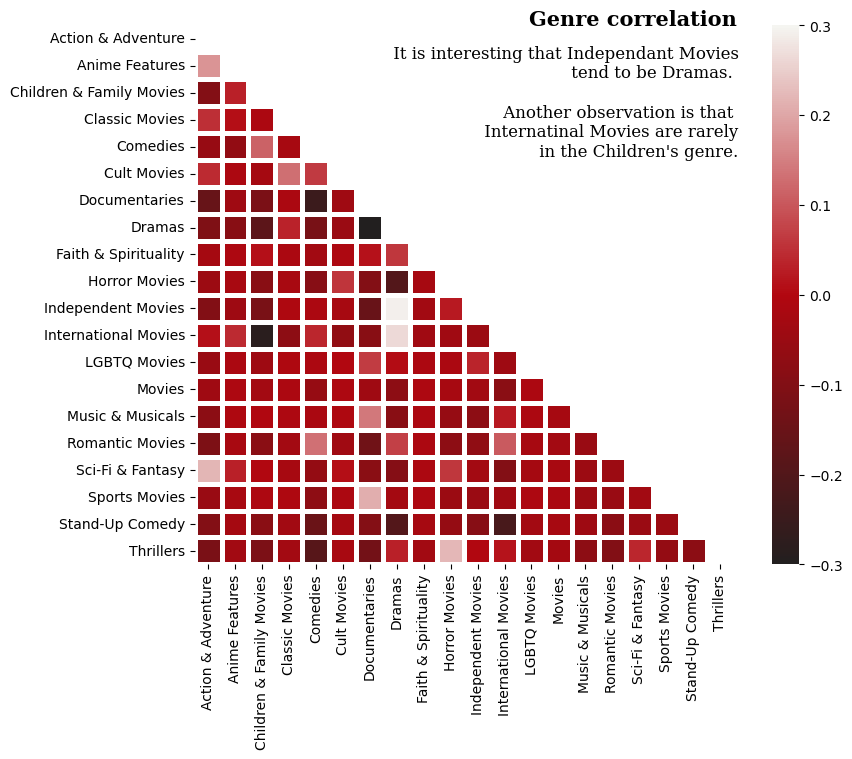

In [38]:
#create a variable called  correl_genres to store the correlation between the main_genres
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
    
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

In [41]:
#create a new dataframe called genre correlations that is the correlation between the main genres 
genre_correlations = df['main_genre'].apply(lambda x: x.split(",")[0]).reset_index()
genre_correlations = genre_correlations.rename(columns = {'main_genre':'genre'})
genre_correlations['genre'] = genre_correlations['genre'].apply(lambda x: x.split(",")[0])
genre_correlations = genre_correlations.join(genre_correlations['genre'].str.get_dummies())
genre_correlations.drop(columns = 'genre', inplace = True)
genre_correlations = genre_correlations.corr()

genre_correlations

,index,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
index,1.000000,0.027157,-0.014614,-0.064924,0.030716,-0.009998,0.010846,0.063182,0.000729,-0.045527,...,0.006581,-0.001390,-0.003911,-0.040520,-0.046164,-0.015349,-0.013908,0.003627,-0.009837,-0.005156
Action & Adventure,0.027157,1.000000,-0.016105,-0.046769,-0.056540,-0.089475,-0.015716,-0.031540,-0.131489,-0.071765,...,-0.003510,-0.065407,-0.020508,-0.021970,-0.038554,-0.028843,-0.011649,-0.003510,-0.014054,-0.028406
Anime Features,-0.014614,-0.016105,1.000000,-0.006954,-0.008407,-0.013305,-0.002337,-0.004690,-0.019552,-0.010671,...,-0.000522,-0.009726,-0.003049,-0.003267,-0.005733,-0.004289,-0.001732,-0.000522,-0.002090,-0.004224
Anime Series,-0.064924,-0.046769,-0.006954,1.000000,-0.024414,-0.038636,-0.006786,-0.013619,-0.056778,-0.030989,...,-0.001516,-0.028243,-0.008855,-0.009487,-0.016648,-0.012454,-0.005030,-0.001516,-0.006069,-0.012266
British TV Shows,0.030716,-0.056540,-0.008407,-0.024414,1.000000,-0.046708,-0.008204,-0.016465,-0.068640,-0.037463,...,-0.001833,-0.034144,-0.010706,-0.011469,-0.020126,-0.015057,-0.006081,-0.001833,-0.007336,-0.014828
Children & Family Movies,-0.009998,-0.089475,-0.013305,-0.038636,-0.046708,1.000000,-0.012983,-0.026056,-0.108624,-0.059285,...,-0.002900,-0.054033,-0.016942,-0.018150,-0.031850,-0.023827,-0.009624,-0.002900,-0.011610,-0.023466
Classic & Cult TV,0.010846,-0.015716,-0.002337,-0.006786,-0.008204,-0.012983,1.000000,-0.004577,-0.019080,-0.010413,...,-0.000509,-0.009491,-0.002976,-0.003188,-0.005594,-0.004185,-0.001690,-0.000509,-0.002039,-0.004122
Classic Movies,0.063182,-0.031540,-0.004690,-0.013619,-0.016465,-0.026056,-0.004577,1.000000,-0.038291,-0.020899,...,-0.001022,-0.019047,-0.005972,-0.006398,-0.011227,-0.008399,-0.003392,-0.001022,-0.004093,-0.008272
Comedies,0.000729,-0.131489,-0.019552,-0.056778,-0.068640,-0.108624,-0.019080,-0.038291,1.000000,-0.087124,...,-0.004262,-0.079405,-0.024897,-0.026672,-0.046806,-0.035016,-0.014143,-0.004262,-0.017062,-0.034485
Crime TV Shows,-0.045527,-0.071765,-0.010671,-0.030989,-0.037463,-0.059285,-0.010413,-0.020899,-0.087124,1.000000,...,-0.002326,-0.043338,-0.013588,-0.014557,-0.025546,-0.019111,-0.007719,-0.002326,-0.009312,-0.018821


In [44]:
genre_correlations.to_csv('Data/genre_correlations.csv', index = False)

In [46]:
df["Cast_count"] = df["cast"].apply(lambda x: len(x.split(",")))
df['Time_btw_release_and_added'] = df['year_added'] - df['release_year']



0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
8802    12.0
8803     1.0
8804    10.0
8805    14.0
8806     4.0
Name: Time_btw_release_and_added, Length: 8790, dtype: float64

In [47]:
df.to_csv('Data/netflix_titles_cleaned.csv', index = False)


In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,first_country,target_ages,genre,main_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0,United States,Teens,[Documentaries],Documentaries
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0,South Africa,Adults,"[International TV Shows, TV Dramas, TV Mysteries]",International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0,United States,Adults,"[Crime TV Shows, International TV Shows, TV Ac...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0,United States,Adults,"[Docuseries, Reality TV]",Docuseries
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0,India,Adults,"[International TV Shows, Romantic TV Shows, TV...",International TV Shows


In [49]:
# Find the name in the cast column that appears the most throughout the dataset
from collections import Counter
cast = df['cast'].str.split(', ')
cast = [x for i in cast for x in i]
cast = Counter(cast)
cast.most_common(2)

[('No Data', 825), ('Anupam Kher', 43)]

In [54]:
#create a dataframe called actor_df that list all the unique actors in the dataset with the number of times they appear and other information
actor_df = pd.DataFrame(cast.most_common(), columns = ['actor', 'count'])
actor_df['actor'] = actor_df['actor'].str.strip()
#exclude No Data from the actor_df
actor_df = actor_df[actor_df['actor'] != 'No Data']
actor_df

,actor,count
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
...,...,...
36388,Ryan Newman,1
36389,Raaghav Chanana,1
36390,Malkeet Rauni,1
36391,Anita Shabdish,1


In [55]:
gdp_data = pd.read_csv('/Users/lucazosso/Desktop/IE_Course/Term_2/Data Vizualisation/Individual Assignement/Data/countries of the world.csv')
gdp_data.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [65]:
userbase = pd.read_csv('Data/Netflix Userbase.csv')
userbase.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [66]:
gdp_data['Country'].unique()
#trim the country names in the gdp_data dataframe
gdp_data['Country'] = gdp_data['Country'].str.strip()

In [67]:
#add only the GDP column to userbase on Country = Country
userbase = userbase.merge(gdp_data[['Country', 'GDP ($ per capita)']], left_on = 'Country', right_on = 'Country', how = 'left')
userbase.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,GDP ($ per capita)
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,37800.0
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,29800.0
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,27700.0
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,29000.0
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,27600.0


In [68]:
userbase.to_csv('Data/Netflix Userbase_gdp.csv', index = False)

In [69]:
userbase['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [73]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'month_name_added', 'year_added', 'first_country',
       'target_ages', 'genre', 'main_genre', 'genre_count_added', 'Cast_count',
       'Time_btw_release_and_added'],
      dtype='object')

## WordCloud

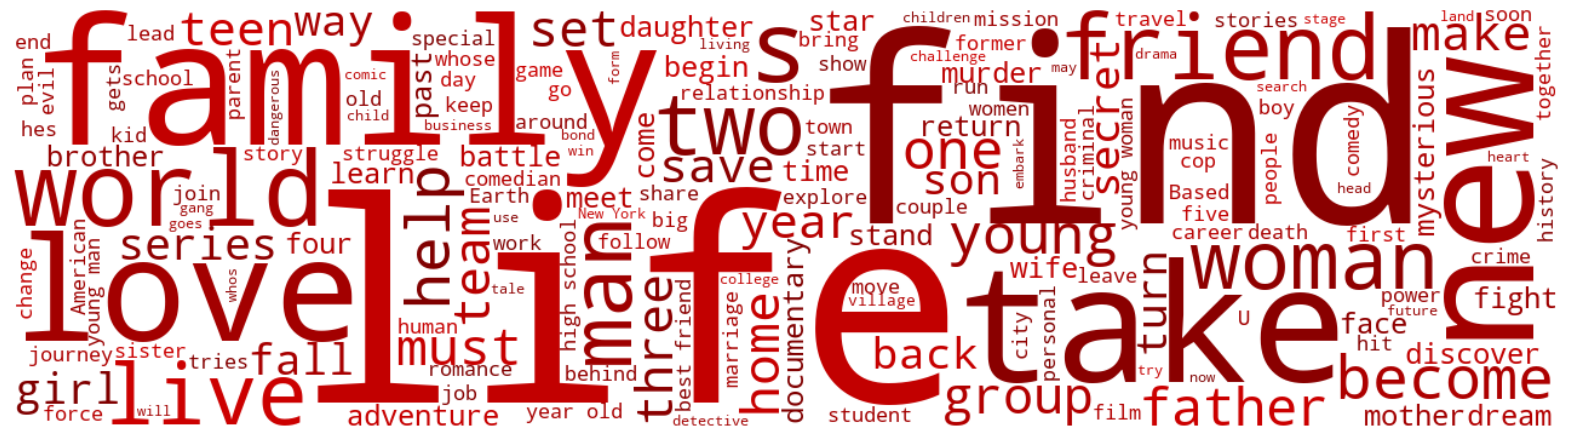

In [76]:
from wordcloud import WordCloud
from PIL import Image
import random

text = str(list(df['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

def red_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return "hsl(0, 100%%, %f%%)" % random.randint(25, 40)

mask = np.array(Image.open('/Users/lucazosso/Desktop/IE_Course/Term_2/Data Vizualisation/Individual Assignement/Data/Netflix_2015_logo.svg.png'))

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 170, mask = mask).generate(text)

wordcloud.recolor(color_func = red_color_func)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()